In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv("indexData.csv")
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Exploring the dataset
print("Dataset Overview:")
print(df.head())  # Display the first few rows of the dataset
print()

# Examine distribution of each column
print("Column Distributions:")
print(df.describe())  # Summary statistics of numerical columns
print()



Dataset Overview:
  Index        Date        Open        High         Low       Close  \
0   NYA  1965-12-31  528.690002  528.690002  528.690002  528.690002   
1   NYA  1966-01-03  527.210022  527.210022  527.210022  527.210022   
2   NYA  1966-01-04  527.840027  527.840027  527.840027  527.840027   
3   NYA  1966-01-05  531.119995  531.119995  531.119995  531.119995   
4   NYA  1966-01-06  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0  

Column Distributions:
                Open           High            Low          Close  \
count  110253.000000  110253.000000  110253.000000  110253.000000   
mean     7658.515222    7704.372961    7608.000422    7657.545872   
std      9011.478913    9066.638548    8954.506981    9011.510444   
min        54.869999      54.869999      54.869999      54.869999   
25%      1855.030029    1864.510010    1843

Data Visualizations:


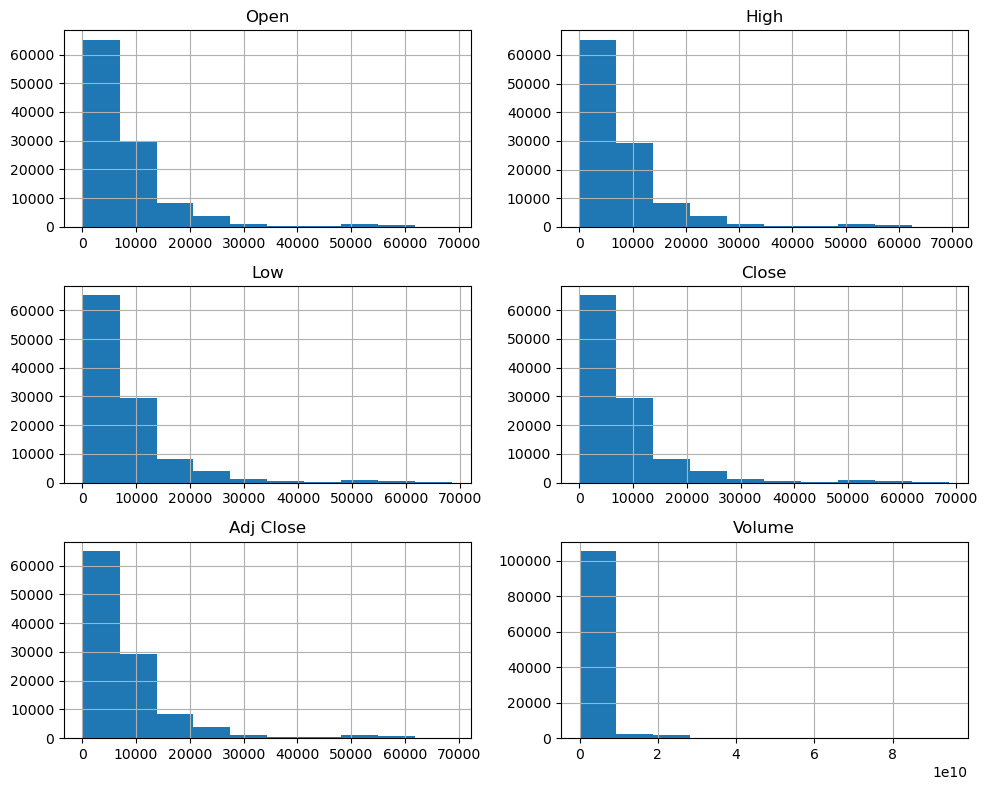

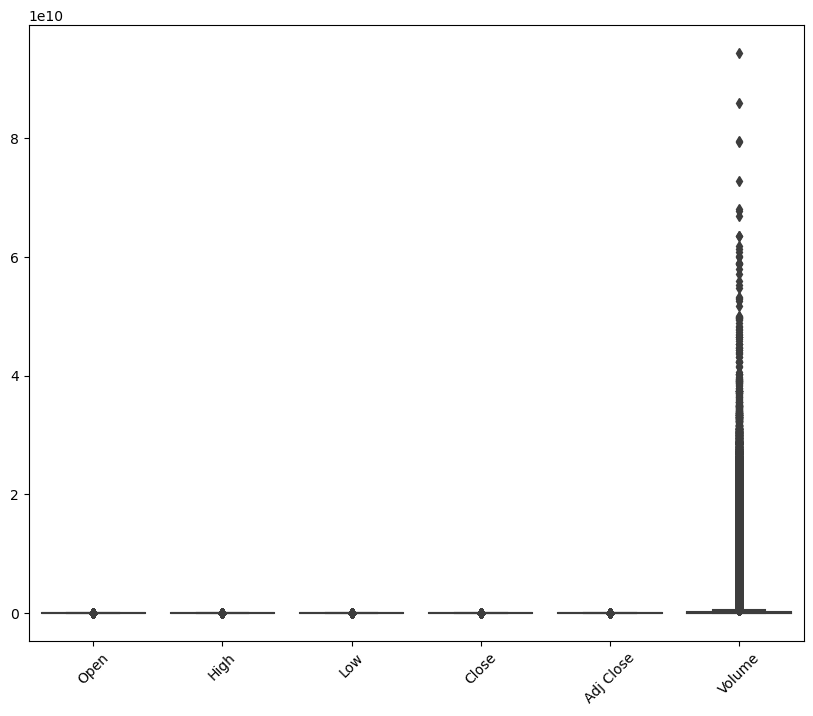

In [4]:
# Generate data visualizations
print("Data Visualizations:")

# Plot histograms of numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot boxplots to identify outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [5]:
#Data Cleaning

In [6]:
#detecting Nulls in all the numeric Features
features_nan_numerical=[features for features in df.columns if df[features].isnull().sum() and df[features].dtype!="object"]

for features in features_nan_numerical:
    print(features,(df[features].isnull().sum()))

Open 2204
High 2204
Low 2204
Close 2204
Adj Close 2204
Volume 2204


In [7]:
#Replacing Null with Median in all Numerical features(columns)

for features in features_nan_numerical:
    median_value=df[features].median()
    df[features].fillna(median_value,inplace=True)

In [8]:
#Detecting and Remvoing Outliers using Inter Quartile Range 
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']

for feature in numerical_features:
        q1=df[feature].quantile(0.25)
        q3=df[feature].quantile(0.75)
        iqr=q3-q1
        lower_lim=q1-1.5*iqr
        upper_lim=q3+1.5*iqr
        
        df=df[(df[feature]<=upper_lim) & (df[feature]>=lower_lim)]
     
       

In [9]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

# Print the cleaned dataset

print(df.head())

  Index        Date        Open        High         Low       Close  \
0   NYA  1965-12-31  528.690002  528.690002  528.690002  528.690002   
1   NYA  1966-01-03  527.210022  527.210022  527.210022  527.210022   
2   NYA  1966-01-04  527.840027  527.840027  527.840027  527.840027   
3   NYA  1966-01-05  531.119995  531.119995  531.119995  531.119995   
4   NYA  1966-01-06  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0  


In [10]:


# Feature Engineering


# Extract time-based features from "Date"
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
# Set "Date" as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create lagged feature: PreviousClose
df['PreviousClose'] = df['Close'].shift(1)

# Compute technical indicators
# Example: Moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Example: Relative Strength Index (RSI)
n = 14  # RSI period
delta = df['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Example: Bollinger Bands
window = 20  # Bollinger Bands window size
std = df['Close'].rolling(window=window).std()
df['BB_upper'] = df['MA_10'] + 2 * std
df['BB_lower'] = df['MA_10'] - 2 * std

# Drop rows with NaN values resulting from feature engineering steps
df.dropna(inplace=True)

# Print the updated dataset with engineered features
print(df.head())


           Index        Open        High         Low       Close   Adj Close  \
Date                                                                           
1966-01-27   NYA  537.359985  537.359985  537.359985  537.359985  537.359985   
1966-01-28   NYA  535.669983  535.669983  535.669983  535.669983  535.669983   
1966-01-31   NYA  533.340027  533.340027  533.340027  533.340027  533.340027   
1966-02-01   NYA  529.109985  529.109985  529.109985  529.109985  529.109985   
1966-02-02   NYA  531.440002  531.440002  531.440002  531.440002  531.440002   

            Volume  DayOfWeek  Month  Year  PreviousClose        MA_5  \
Date                                                                    
1966-01-27     0.0          3      1  1966     537.570007  537.335986   
1966-01-28     0.0          4      1  1966     537.359985  537.273987   
1966-01-31     0.0          0      1  1966     535.669983  536.407996   
1966-02-01     0.0          1      2  1966     533.340027  534.609997   
1

In [11]:
#Categorcial to Numerical Features Conversion
categorical=[features for features in df.columns if df[features].dtype=="object"]
categorical

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


for features in categorical:
    #label_encoder=LabelEncoder()
    df[features]=label_encoder.fit_transform(df[features])

In [12]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the features and the target variable
X = df.drop('Close', axis=1)  # Features
y = df['Close']  # Target variable

# Perform univariate feature selection
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Print the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
['Open', 'High', 'Low', 'Adj Close', 'MA_5']


In [13]:
# Separate the features and the target variable

y = df['Close']  # Target variable
x=df[['Open', 'High', 'Low', 'Adj Close', 'MA_5']]
x

,Open,High,Low,Adj Close,MA_5
Date,,,,,
1966-01-27,537.359985,537.359985,537.359985,537.359985,537.335986
1966-01-28,535.669983,535.669983,535.669983,535.669983,537.273987
1966-01-31,533.340027,533.340027,533.340027,533.340027,536.407996
1966-02-01,529.109985,529.109985,529.109985,529.109985,534.609997
1966-02-02,531.440002,531.440002,531.440002,531.440002,533.383996
...,...,...,...,...,...
2021-05-26,1247.119995,1248.640015,1241.199951,1243.420044,1240.452026
2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1245.316016
2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1247.318018


In [14]:
# Scaling data means from large numbers to -1 to +1 so it is easy to compute

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Parameter grid for Multiple Linear Regression (no hyperparameters to tune)

# Parameter grid for Lasso Regression
lasso_param_grid = {'alpha': [0.1, 1, 10]}


In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Multiple Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_pred = linear_regression.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

In [19]:
# Lasso Regression
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)


/Users/tejasrajput/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+08, tolerance: 1.301e+08
  model = cd_fast.enet_coordinate_descent(


In [20]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
gb_pred = gradient_boosting.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [21]:
# Ridge Regression
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(X_train, y_train)
ridge_pred = ridge_regression.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM




# RNN (LSTM)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=10, batch_size=16, verbose=0)
rnn_pred = model.predict(X_test_lstm)
rnn_pred = rnn_pred.reshape(rnn_pred.shape[0])
rnn_mse = mean_squared_error(y_test, rnn_pred)
rnn_r2 = r2_score(y_test, rnn_pred)



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Create a dictionary to store the metrics
metrics = {
    'Linear Regression': {'MSE': linear_mse, 'R-squared': linear_r2},
    'Lasso Regression': {'MSE': lasso_mse, 'R-squared': lasso_r2},
    'Ridge Regression': {'MSE': ridge_mse, 'R-squared': ridge_r2},
    'Gradient Boosting': {'MSE': gb_mse, 'R-squared': gb_r2},
    'RNN (LSTM)': {'MSE': rnn_mse, 'R-squared': rnn_r2}
}

# Print the metrics
for model_name, metric in metrics.items():
    print(f'{model_name}:')
    print(f'Mean Squared Error (MSE): {metric["MSE"]}')
    print(f'R-squared: {metric["R-squared"]}')
    print('')

# Select the best model based on MSE
best_model_mse = min(metrics, key=lambda x: metrics[x]['MSE'])
print(f'Best model based on MSE: {best_model_mse}')

# Select the best model based on R-squared
best_model_r2 = max(metrics, key=lambda x: metrics[x]['R-squared'])
print(f'Best model based on R-squared: {best_model_r2}')
